C:\Users\iwona\AppData\Local\Temp/ipykernel_5820/1911472789.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wykres_8_df_odw['klucz'] = None
C:\Users\iwona\AppData\Local\Temp/ipykernel_5820/1911472789.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wykres_8_df_nieodw['klucz'] = None
C:\Users\iwona\AppData\Local\Temp/ipykernel_5820/1911472789.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

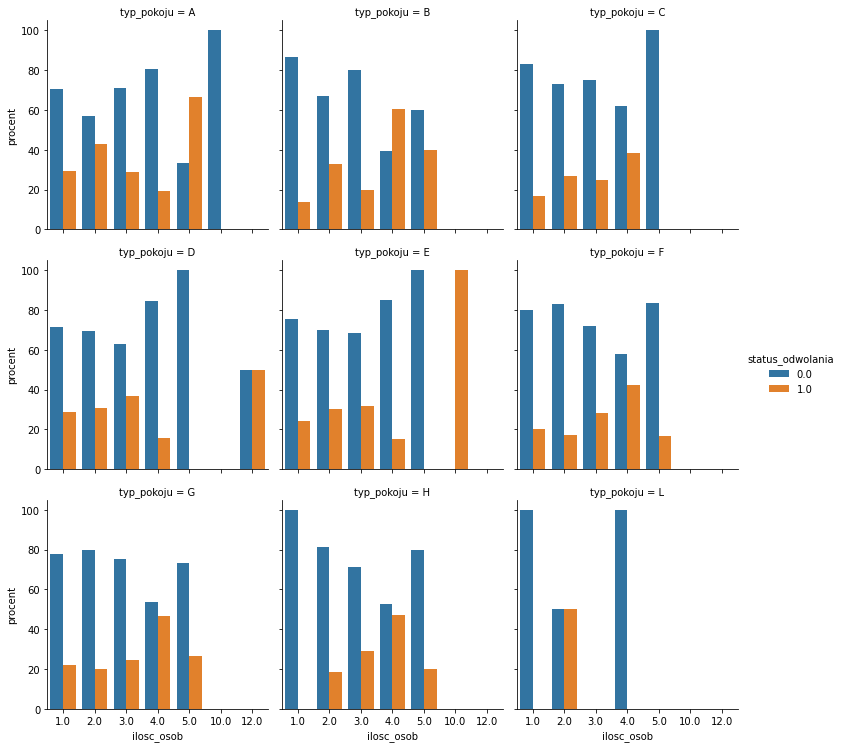

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
tabela_glowna.isna().any()

tabela_wiek = tabela_glowna[['is_canceled', 'adults', 'children', 'babies', 'reserved_room_type']].fillna(0.0)
tabela_wiek['all'] = tabela_wiek['adults'] + tabela_wiek['children'] + tabela_wiek['babies']

tabela_wiek['ilosc'] = 1

tabela_all = tabela_wiek[tabela_wiek['all']!= 0][['is_canceled','all', 'reserved_room_type', 'ilosc']]
tabela_all

tabela_all.groupby(by = ['is_canceled','reserved_room_type', 'all']).count()#powyzej 12 osób jest zawsze odwoływane i dla 6 osob
tabela_all_grup = tabela_all[(tabela_all['all']!=6) & (tabela_all['all']<13)].groupby(by = ['is_canceled','reserved_room_type', 'all'])
tabela_all_grup.count()

W = []
status_odwoalania = []
ilosc_osob = []
typ_pokoju = []

for key, value in tabela_all_grup:
    key = list(key)
    W.append(key)

for m, n, o in W:
    status_odwoalania.append(m)
    ilosc_osob.append(o)
    typ_pokoju.append(n)

rezerwacje = tabela_all_grup.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

wykres_8={
    'status_odwolania':status_odwoalania,
    'typ_pokoju':typ_pokoju,
    'ilosc_osob':ilosc_osob,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
wykres_8
wykres_8_df = pd.DataFrame(wykres_8)
wykres_8_df

wykres_8_df_odw = wykres_8_df[wykres_8_df['status_odwolania'] == 1]
wykres_8_df_odw['klucz'] = None
for i in range(len(wykres_8_df_odw['status_odwolania'])):
    f1 = wykres_8_df_odw['typ_pokoju'].values[i]
    f2 = wykres_8_df_odw['ilosc_osob'].values[i]
    wykres_8_df_odw['klucz'].values[i]=f'{f1}; {f2}'
wykres_8_df_odw.reset_index(drop=True)

wykres_8_df_nieodw = wykres_8_df[wykres_8_df['status_odwolania'] == 0]
wykres_8_df_nieodw['klucz'] = None
for i in range(len(wykres_8_df_nieodw['status_odwolania'])):
    f1 = wykres_8_df_nieodw['typ_pokoju'].values[i]
    f2 = wykres_8_df_nieodw['ilosc_osob'].values[i]
    wykres_8_df_nieodw['klucz'].values[i]=f'{f1}; {f2}'
wykres_8_df_nieodw.reset_index(drop=True)

tab_1= pd.merge(wykres_8_df_odw, wykres_8_df_nieodw, on='klucz', how="outer")
tab_2 = tab_1.fillna(0.0)
tab_2['suma'] = tab_2['ilosc_rezerwacji_x'] + tab_2['ilosc_rezerwacji_y']
tab_2

tab_2['procent_odw'] = (tab_2['ilosc_rezerwacji_x']/tab_2['suma'])*100
tab_2['procent_nieodw'] = (tab_2['ilosc_rezerwacji_y']/tab_2['suma'])*100
tab_2

tab_2_odw = tab_2[['status_odwolania_x', 'typ_pokoju_x', 'ilosc_osob_x', 'ilosc_rezerwacji_x','procent_odw']]
tab_2_odw['status_odwolania'] = tab_2_odw['status_odwolania_x']
tab_2_odw['typ_pokoju'] = tab_2_odw['typ_pokoju_x']
tab_2_odw['ilosc_osob'] = tab_2_odw['ilosc_osob_x']
tab_2_odw['ilosc_rezerwacji'] = tab_2_odw['ilosc_rezerwacji_x']
tab_2_odw['procent'] = tab_2_odw['procent_odw']
tab_odw = tab_2_odw [['status_odwolania', 'typ_pokoju', 'ilosc_osob', 'ilosc_rezerwacji','procent']]


tab_2_nieodw = tab_2[['status_odwolania_y', 'typ_pokoju_y', 'ilosc_osob_y', 'ilosc_rezerwacji_y','procent_nieodw']]
tab_2_nieodw['status_odwolania'] = tab_2_nieodw['status_odwolania_y']
tab_2_nieodw['typ_pokoju'] = tab_2_nieodw['typ_pokoju_y']
tab_2_nieodw['ilosc_osob'] = tab_2_nieodw['ilosc_osob_y']
tab_2_nieodw['ilosc_rezerwacji'] = tab_2_nieodw['ilosc_rezerwacji_y']
tab_2_nieodw['procent'] = tab_2_nieodw['procent_nieodw']
tab_nieodw = tab_2_nieodw [['status_odwolania', 'typ_pokoju', 'ilosc_osob', 'ilosc_rezerwacji','procent']]

tab_3 = pd.concat([tab_nieodw, tab_odw])
tab_4 = tab_3[tab_3['typ_pokoju']!= 0].reset_index(drop=True)
tab_4

g = sns.catplot(x='ilosc_osob', y='procent', hue = 'status_odwolania', col="typ_pokoju",col_wrap=3,data=tab_4,kind="bar", height=3.5)